In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("latestDataofsensor.csv")

In [3]:
data.head()

,Unnamed: 0,DeviceId,Date,Time,Parking_Status
0,0,00-80-00-00-04-01-a4-a2,2021-08-15,16:56:13,0
1,1,00-80-00-00-04-01-a4-a2,2021-07-30,19:47:47,0
2,2,00-80-00-00-04-01-a4-a2,2021-08-16,20:23:31,0
3,3,00-80-00-00-04-01-a4-a2,2021-06-06,15:25:40,0
4,4,00-80-00-00-04-01-a4-a2,2021-08-07,04:55:33,0


In [4]:
datanew = data.drop("Unnamed: 0", axis = 1)

In [5]:
data_sort = datanew.sort_values(['Date', 'Time'], ascending=[True, True])

In [6]:

data_sort.dtypes
print(data_sort)

                       DeviceId        Date      Time  Parking_Status
187535  00-80-00-00-04-01-a0-20  2020-12-15  10:44:50               0
187536  00-80-00-00-04-01-a0-20  2020-12-15  10:44:50               0
221189  00-80-00-00-04-01-a0-20  2020-12-15  10:44:50               0
217532  00-80-00-00-04-01-a0-20  2021-02-18  07:41:02               1
77007   00-80-00-00-04-01-a4-9f  2021-02-18  07:41:20               1
...                         ...         ...       ...             ...
86443   00-80-00-00-04-01-a4-9f  2021-11-11  13:19:43               1
39926   00-80-00-00-04-01-a4-a2  2021-11-11  13:19:55               0
134675  00-80-00-00-04-01-9f-d8  2021-11-11  13:21:04               1
479113  00-80-00-00-04-01-a4-91  2021-11-11  13:21:15               1
273557  00-80-00-00-04-01-a4-b7  2021-11-11  13:21:46               0

[490655 rows x 4 columns]


In [7]:
data_sort["datetime"] = data_sort["Date"]+ " " +data_sort["Time"]

In [8]:
datanew.head()

,DeviceId,Date,Time,Parking_Status
0,00-80-00-00-04-01-a4-a2,2021-08-15,16:56:13,0
1,00-80-00-00-04-01-a4-a2,2021-07-30,19:47:47,0
2,00-80-00-00-04-01-a4-a2,2021-08-16,20:23:31,0
3,00-80-00-00-04-01-a4-a2,2021-06-06,15:25:40,0
4,00-80-00-00-04-01-a4-a2,2021-08-07,04:55:33,0


In [9]:
data_sort.datetime = data_sort.datetime.astype('datetime64')

In [10]:
data_sort.dtypes

DeviceId                  object
Date                      object
Time                      object
Parking_Status             int64
datetime          datetime64[ns]
dtype: object

In [11]:
datanew_clean = data_sort.copy()

In [12]:
datanew_clean['adate'] = datanew_clean.datetime.dt.date
datanew_clean['day'] = datanew_clean.datetime.dt.day
datanew_clean['month'] = datanew_clean.datetime.dt.month
datanew_clean['date_time_halfhour'] = datanew_clean.datetime.dt.round('5min')
datanew_clean['atime'] = datanew_clean.date_time_halfhour.dt.time
datanew_clean['btime'] = datanew_clean.date_time_halfhour.dt.strftime('%H:%M')

In [13]:
datanew_clean.head()

,DeviceId,Date,Time,Parking_Status,datetime,adate,day,month,date_time_halfhour,atime,btime
187535,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:45:00,10:45:00,10:45
187536,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:45:00,10:45:00,10:45
221189,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:45:00,10:45:00,10:45
217532,00-80-00-00-04-01-a0-20,2021-02-18,07:41:02,1,2021-02-18 07:41:02,2021-02-18,18,2,2021-02-18 07:40:00,07:40:00,07:40
77007,00-80-00-00-04-01-a4-9f,2021-02-18,07:41:20,1,2021-02-18 07:41:20,2021-02-18,18,2,2021-02-18 07:40:00,07:40:00,07:40


In [14]:
#datanew_clean.to_csv('data.csv', index=False)
datanew_clean['Sensorp'] = datanew_clean['DeviceId'].replace(['00-80-00-00-04-01-a4-a2','00-80-00-00-04-01-a4-9f','00-80-00-00-04-01-9f-d8', '00-80-00-00-04-01-a4-8d' ,'00-80-00-00-04-01-a0-20','00-80-00-00-04-01-a4-b7','00-80-00-00-04-01-9f-db','00-80-00-00-04-01-9f-d7','00-80-00-00-04-01-9f-ea','00-80-00-00-04-01-a4-91'],['Sensor1','Sensor2','Sensor3','Sensor4','Sensor5','Sensor6','Sensor7','Sensor8','Sensor9','Sensor10'])

In [15]:
datanew_clean.groupby('atime').size()
print(datanew_clean['DeviceId'].unique())
datanew_clean.head()

['00-80-00-00-04-01-a0-20' '00-80-00-00-04-01-a4-9f'
 '00-80-00-00-04-01-9f-db' '00-80-00-00-04-01-a4-a2'
 '00-80-00-00-04-01-a4-8d' '00-80-00-00-04-01-9f-d8'
 '00-80-00-00-04-01-a4-b7' '00-80-00-00-04-01-9f-ea'
 '00-80-00-00-04-01-a4-91' '00-80-00-00-04-01-9f-d7']


,DeviceId,Date,Time,Parking_Status,datetime,adate,day,month,date_time_halfhour,atime,btime,Sensorp
187535,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:45:00,10:45:00,10:45,Sensor5
187536,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:45:00,10:45:00,10:45,Sensor5
221189,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:45:00,10:45:00,10:45,Sensor5
217532,00-80-00-00-04-01-a0-20,2021-02-18,07:41:02,1,2021-02-18 07:41:02,2021-02-18,18,2,2021-02-18 07:40:00,07:40:00,07:40,Sensor5
77007,00-80-00-00-04-01-a4-9f,2021-02-18,07:41:20,1,2021-02-18 07:41:20,2021-02-18,18,2,2021-02-18 07:40:00,07:40:00,07:40,Sensor2


In [16]:
aggregatedatanew = datanew_clean.drop_duplicates(['btime','month','day','Sensorp'], keep="last")

In [17]:
aggregatedatanew.head()

,DeviceId,Date,Time,Parking_Status,datetime,adate,day,month,date_time_halfhour,atime,btime,Sensorp
221189,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:45:00,10:45:00,10:45,Sensor5
217532,00-80-00-00-04-01-a0-20,2021-02-18,07:41:02,1,2021-02-18 07:41:02,2021-02-18,18,2,2021-02-18 07:40:00,07:40:00,07:40,Sensor5
77007,00-80-00-00-04-01-a4-9f,2021-02-18,07:41:20,1,2021-02-18 07:41:20,2021-02-18,18,2,2021-02-18 07:40:00,07:40:00,07:40,Sensor2
309155,00-80-00-00-04-01-9f-db,2021-02-18,07:43:05,1,2021-02-18 07:43:05,2021-02-18,18,2,2021-02-18 07:45:00,07:45:00,07:45,Sensor7
31646,00-80-00-00-04-01-a4-a2,2021-02-18,07:43:19,1,2021-02-18 07:43:19,2021-02-18,18,2,2021-02-18 07:45:00,07:45:00,07:45,Sensor1


In [18]:
aggregatedatanewsub = aggregatedatanew[['datetime','Sensorp', 'adate', 'btime', 'day', 'month', 'Parking_Status']]

In [19]:
aggregatedatanewsub.head()

,datetime,Sensorp,adate,btime,day,month,Parking_Status
221189,2020-12-15 10:44:50,Sensor5,2020-12-15,10:45,15,12,0
217532,2021-02-18 07:41:02,Sensor5,2021-02-18,07:40,18,2,1
77007,2021-02-18 07:41:20,Sensor2,2021-02-18,07:40,18,2,1
309155,2021-02-18 07:43:05,Sensor7,2021-02-18,07:45,18,2,1
31646,2021-02-18 07:43:19,Sensor1,2021-02-18,07:45,18,2,1


In [20]:
aggregatedatanewsub.reset_index(drop=True)

,datetime,Sensorp,adate,btime,day,month,Parking_Status
0,2020-12-15 10:44:50,Sensor5,2020-12-15,10:45,15,12,0
1,2021-02-18 07:41:02,Sensor5,2021-02-18,07:40,18,2,1
2,2021-02-18 07:41:20,Sensor2,2021-02-18,07:40,18,2,1
3,2021-02-18 07:43:05,Sensor7,2021-02-18,07:45,18,2,1
4,2021-02-18 07:43:19,Sensor1,2021-02-18,07:45,18,2,1
...,...,...,...,...,...,...,...
445758,2021-11-11 13:19:43,Sensor2,2021-11-11,13:20,11,11,1
445759,2021-11-11 13:19:55,Sensor1,2021-11-11,13:20,11,11,0
445760,2021-11-11 13:21:04,Sensor3,2021-11-11,13:20,11,11,1
445761,2021-11-11 13:21:15,Sensor10,2021-11-11,13:20,11,11,1


In [21]:
aggregatedatanewsub.groupby('Sensorp').count()

,datetime,adate,btime,day,month,Parking_Status
Sensorp,,,,,,
Sensor1,46574,46574,46574,46574,46574,46574
Sensor10,44934,44934,44934,44934,44934,44934
Sensor2,46451,46451,46451,46451,46451,46451
Sensor3,47196,47196,47196,47196,47196,47196
Sensor4,46306,46306,46306,46306,46306,46306
Sensor5,46607,46607,46607,46607,46607,46607
Sensor6,44561,44561,44561,44561,44561,44561
Sensor7,44734,44734,44734,44734,44734,44734
Sensor8,32274,32274,32274,32274,32274,32274


In [22]:
#aggregatedatanewsub.assign(Capacity='10')

In [23]:
aggregatedatanewsub.reset_index(drop=True)
aggregatedata = aggregatedatanewsub.groupby(['Sensorp','month','day','btime','Parking_Status']).size().reset_index(name='Occp')

In [24]:
print(aggregatedata)
aggregatedata['TotalCapacity'] = 1

        Sensorp  month  day  btime  Parking_Status  Occp
0       Sensor1      2   18  07:45               1     1
1       Sensor1      2   18  07:50               1     1
2       Sensor1      2   18  07:55               1     1
3       Sensor1      2   18  08:00               1     1
4       Sensor1      2   18  08:05               1     1
...         ...    ...  ...    ...             ...   ...
445758  Sensor9     11   11  12:45               1     1
445759  Sensor9     11   11  12:50               1     1
445760  Sensor9     11   11  12:55               1     1
445761  Sensor9     11   11  13:00               1     1
445762  Sensor9     11   11  13:20               1     1

[445763 rows x 6 columns]


In [25]:
len(aggregatedata)

aggregatedata.reset_index(drop=True)
aggregatedata["PercentOccupany"]= (aggregatedata['Parking_Status']/aggregatedata['TotalCapacity'])*100


In [36]:
aggregatedata.head()
#aggregatedatanewsub["OccupiedPS"] = aggregatedata["Occp"].values
aggregatedata.to_csv('SensorOccupancy5mininterval')

In [27]:
aggregatedatanewsub.groupby(['Parking_Status']).count()
#aggregatedata = aggregatedata[aggregatedata.Parking_Status != 0]

#aggregatedata.head()

,datetime,Sensorp,adate,btime,day,month
Parking_Status,,,,,,
0,310170,310170,310170,310170,310170,310170
1,135593,135593,135593,135593,135593,135593


In [28]:

#aggregatedata.assign(ParkingLot='University_Parking')

In [29]:
aggregatedata.dtypes
aggregatedata["datetime"] = "2021"+"-"+ aggregatedata["month"].astype(str) + "-" + aggregatedata["day"].astype(str) + " " + aggregatedata["btime"]
aggregatedata.head()

,Sensorp,month,day,btime,Parking_Status,Occp,TotalCapacity,PercentOccupany,datetime
0,Sensor1,2,18,07:45,1,1,1,100.0,2021-2-18 07:45
1,Sensor1,2,18,07:50,1,1,1,100.0,2021-2-18 07:50
2,Sensor1,2,18,07:55,1,1,1,100.0,2021-2-18 07:55
3,Sensor1,2,18,08:00,1,1,1,100.0,2021-2-18 08:00
4,Sensor1,2,18,08:05,1,1,1,100.0,2021-2-18 08:05


In [30]:
aggregatedata.datetime = aggregatedata.datetime.astype('datetime64')
aggregatedata.head()

,Sensorp,month,day,btime,Parking_Status,Occp,TotalCapacity,PercentOccupany,datetime
0,Sensor1,2,18,07:45,1,1,1,100.0,2021-02-18 07:45:00
1,Sensor1,2,18,07:50,1,1,1,100.0,2021-02-18 07:50:00
2,Sensor1,2,18,07:55,1,1,1,100.0,2021-02-18 07:55:00
3,Sensor1,2,18,08:00,1,1,1,100.0,2021-02-18 08:00:00
4,Sensor1,2,18,08:05,1,1,1,100.0,2021-02-18 08:05:00


In [31]:

#plt.bar(aggregatedata["Sensorp"], aggregatedata["PercentOccupany"])
Sensor_aggregate = aggregatedata.groupby(['Sensorp',], as_index=False).agg({'PercentOccupany':"mean"})
print(Sensor_aggregate)

Sensor_aggregate = Sensor_aggregate.sort_values(['PercentOccupany'], ascending=[True])

    Sensorp  PercentOccupany
0   Sensor1        32.900331
1  Sensor10        62.676370
2   Sensor2        44.595380
3   Sensor3        24.510552
4   Sensor4        24.826156
5   Sensor5        21.307958
6   Sensor6        22.629654
7   Sensor7        20.747083
8   Sensor8        25.119291
9   Sensor9        23.685123


Text(0.5, 1.0, 'Aggregated Parking consumption at Different Parking Spot')

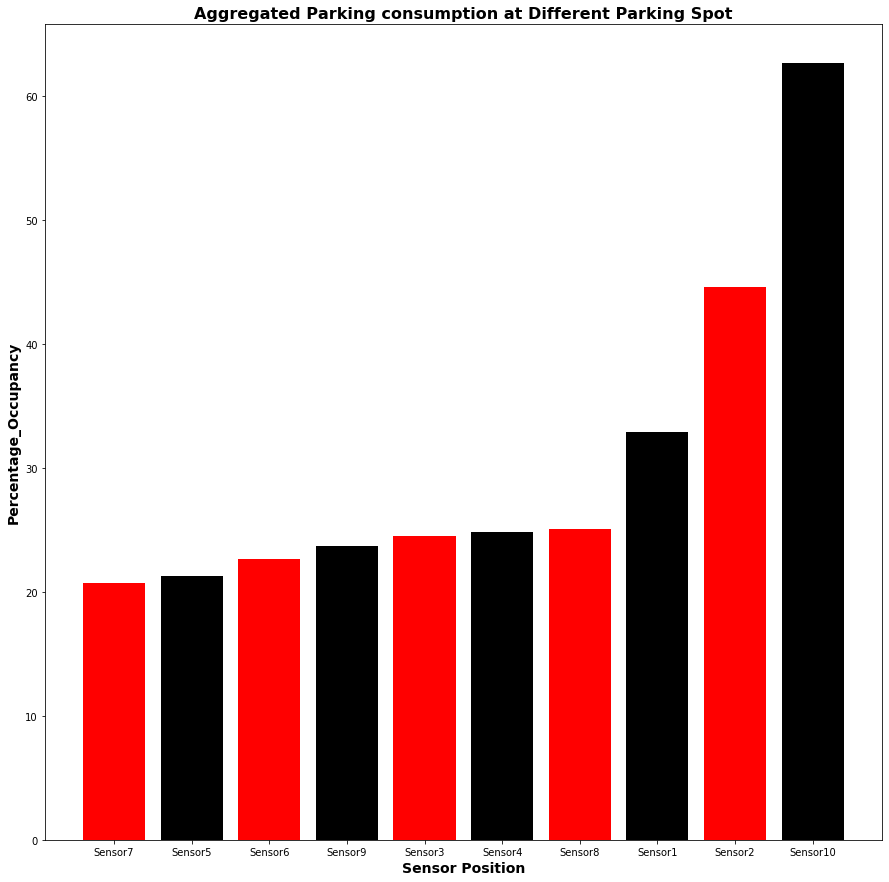

In [32]:
fig, ax = plt.subplots(figsize=(15,15))
ax.bar(Sensor_aggregate["Sensorp"], Sensor_aggregate["PercentOccupany"], color = ['red','black'])
ax.set_xticks(Sensor_aggregate["Sensorp"])
#ax.set_xticks(month_aggregate["PercentOccupany"])
plt.ylabel("Percentage_Occupancy", fontsize=14, fontweight='bold')
plt.xlabel("Sensor Position", fontsize=14, fontweight='bold')
plt.title("Aggregated Parking consumption at Different Parking Spot",fontsize=16, fontweight='bold')


In [33]:
#plt.bar(aggregatedata["Sensorp"], aggregatedata["PercentOccupany"])
MonthbaseSensor_aggregate = aggregatedata.groupby(['Sensorp','month'], as_index=False).agg({'PercentOccupany':"mean"})
print(MonthbaseSensor_aggregate)

#MonthbaseSensor_aggregate = Sensor_aggregate.sort_values(['PercentOccupany'], ascending=[True])

    Sensorp  month  PercentOccupany
0   Sensor1      2        29.331683
1   Sensor1      3        50.153846
2   Sensor1      4        33.646354
3   Sensor1      5        28.879652
4   Sensor1      6        23.890785
..      ...    ...              ...
93  Sensor9      7        13.365575
94  Sensor9      8        19.945430
95  Sensor9      9        31.652118
96  Sensor9     10        32.741536
97  Sensor9     11        47.260834

[98 rows x 3 columns]


NameError: name 'S5y' is not defined

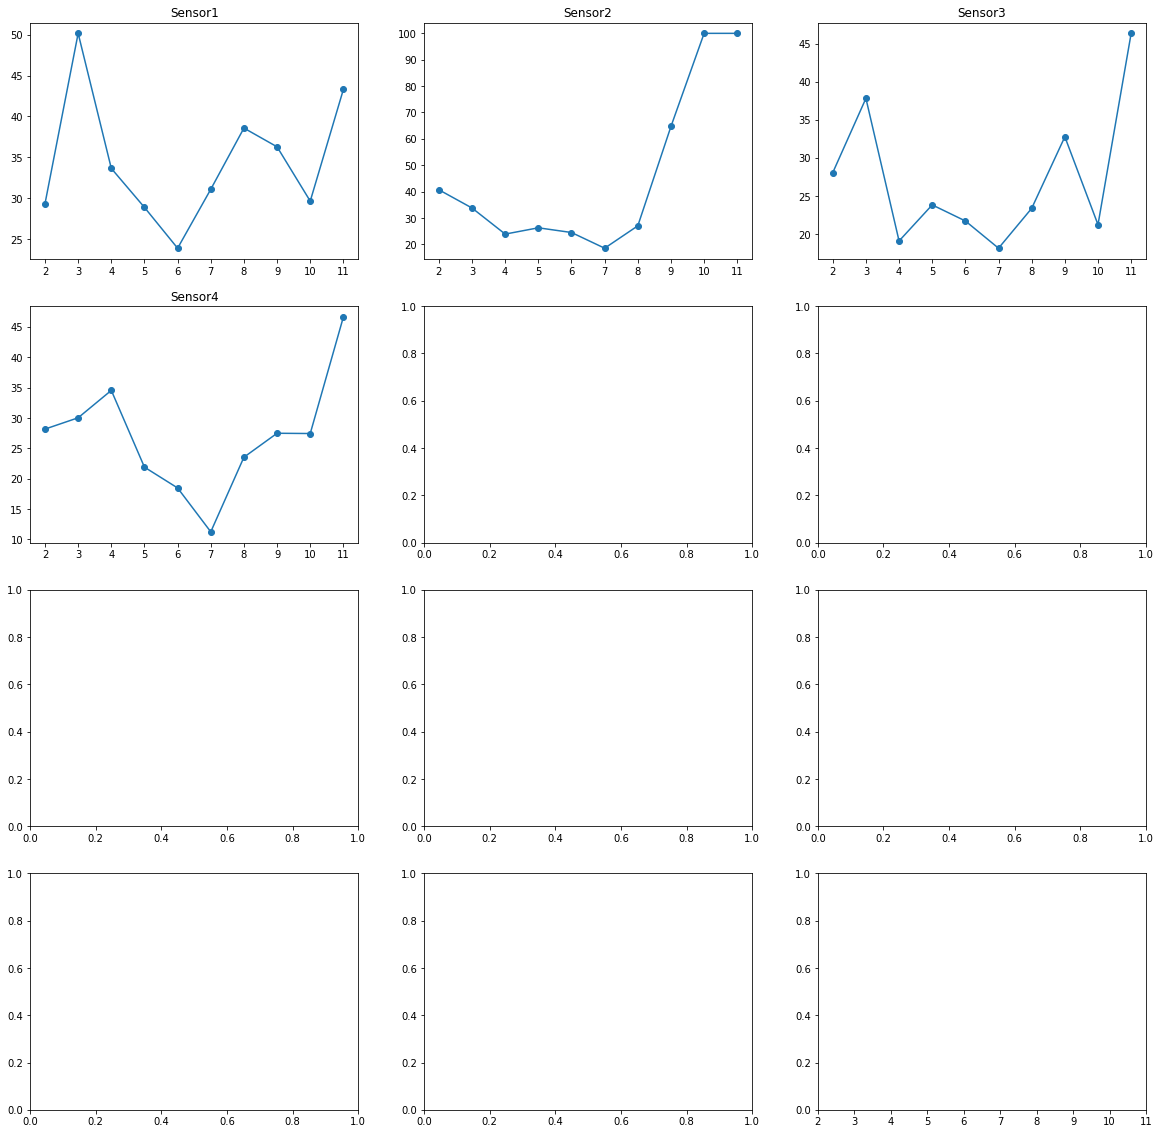

In [34]:
figure, axis = plt.subplots(4,3,figsize=(20,20))
plt.xlim([2, 11])
S1y = MonthbaseSensor_aggregate[MonthbaseSensor_aggregate.Sensorp == 'Sensor1']
S2y = MonthbaseSensor_aggregate[MonthbaseSensor_aggregate.Sensorp == 'Sensor2']
S3y = MonthbaseSensor_aggregate[MonthbaseSensor_aggregate.Sensorp == 'Sensor3']
S4y = MonthbaseSensor_aggregate[MonthbaseSensor_aggregate.Sensorp == 'Sensor4']
#S5y = MonthbaseSensor_aggregate[MonthbaseSensor_aggregate.Sensorp == 'Sensor5']
S6y = MonthbaseSensor_aggregate[MonthbaseSensor_aggregate.Sensorp == 'Sensor6']
S7y = MonthbaseSensor_aggregate[MonthbaseSensor_aggregate.Sensorp == 'Sensor7']
#S8y = MonthbaseSensor_aggregate[MonthbaseSensor_aggregate.Sensorp == 'Sensor8']
S9y = MonthbaseSensor_aggregate[MonthbaseSensor_aggregate.Sensorp == 'Sensor9']
S10y = MonthbaseSensor_aggregate[MonthbaseSensor_aggregate.Sensorp == 'Sensor10']

axis[0, 0].plot(S1y["month"],S1y["PercentOccupany"], marker = 'o')
axis[0, 0].set_title("Sensor1")
axis[0, 0].set_xticks(S1y["month"])
  
# For Tangent Function
axis[0, 1].plot(S2y["month"],S2y["PercentOccupany"], marker = 'o')
axis[0, 1].set_title("Sensor2")
axis[0, 1].set_xticks(S2y["month"])
  
# For Tanh Function
axis[0, 2].plot(S3y["month"],S3y["PercentOccupany"], marker = 'o')
axis[0, 2].set_title("Sensor3")
axis[0, 2].set_xticks(S3y["month"])

axis[1, 0].plot(S4y["month"],S4y["PercentOccupany"], marker = 'o')
axis[1, 0].set_title("Sensor4")
axis[1, 0].set_xticks(S4y["month"])
#axis[1, 1].set_xlim(1,11)

axis[1, 1].plot(S5y["month"],S5y["PercentOccupany"], marker = 'o')
axis[1, 1].set_title("Sensor5")
axis[1, 1].set_xticks(S5y["month"])
axis[1, 1].set_xlim(1,11)
  
# For Tangent Function
axis[1, 2].plot(S6y["month"],S6y["PercentOccupany"], marker = 'o')
axis[1, 2].set_title("Sensor6")
axis[1, 2].set_xticks(S6y["month"])
  
# For Tanh Function
axis[2, 0].plot(S7y["month"],S7y["PercentOccupany"], marker = 'o')
axis[2, 0].set_title("Sensor7")
axis[2, 0].set_xticks(S7y["month"])


axis[2, 1].plot(S8y["month"],S8y["PercentOccupany"], marker = 'o')
axis[2, 1].set_title("Sensor8")
axis[2, 1].set_xticks(S8y["month"])
#axis[2, 0].set_xticks(S4y["month"])

axis[2, 2].plot(S9y["month"],S9y["PercentOccupany"], marker = 'o')
axis[2, 2].set_title("Sensor9")
axis[2, 2].set_xticks(S9y["month"])


axis[3, 1].plot(S10y["month"],S10y["PercentOccupany"], marker = 'o')
axis[3, 1].set_title("Sensor10")
axis[3, 1].set_xticks(S10y["month"])




#plt.plot(S1y["month"],S1y["PercentOccupany"], color='red', label='Sensor1', marker = 'o')
#plt.plot(S1y["month"],S2y["PercentOccupany"], color='blue', label='Sensor2', marker = 'o')
#plt.plot(S1y["month"],S3y["PercentOccupany"], color='yellow', label='Sensor3', marker = 'o')

#plt.plot(S1y["month"],S4y["PercentOccupany"], color='green', label='Sensor4', marker = 'o')
#plt.plot(S1y["month"],S5y["PercentOccupany"], color='purple', label='Sensor5', marker = 'o')
#plt.plot(S1y["month"],S6y["PercentOccupany"], color='orange', label='Sensor6', marker = 'o')

#plt.plot(S1y["month"],S7y["PercentOccupany"], color='grey', label='Sensor7', marker = 'o')
#plt.plot(S1y["month"],S8y["PercentOccupany"], color='black', label='Sensor8', marker = 'o')
#plt.plot(S1y["month"],S9y["PercentOccupany"], color='pink', label='Sensor9', marker = 'o')

#plt.plot(S1y["month"],S10y["PercentOccupany"], color='darkblue', label='Sensor10', marker = 'o')



#plt.plot(X, z, color='g', label='cos')
#axis[0, 0].plot(S1y["month"], S1y["PercentOccupany"], )
#axis[0, 0].set_title("Sensor1")
  

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.style.use('ggplot')
ax.barh(month_aggregate["month"], month_aggregate["PercentOccupany"], color = 'coral')
ax.set_yticks(month_aggregate["month"])
#ax.set_xticks(month_aggregate["PercentOccupany"])
plt.ylabel("Months", fontsize=16, fontweight='bold')
plt.xlabel("Percentage_Occupancy", fontsize=16, fontweight='bold')
plt.title("Aggregated Parking spot consumption over period Months")


In [ ]:
day_aggregate = aggregatedata.groupby('day', as_index=False).agg({'PercentOccupany':"mean"})

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.style.use('ggplot')
ax.plot(day_aggregate["day"], day_aggregate["PercentOccupany"])
plt.xlabel("days")
plt.ylabel("Percentage_Occupancy")
plt.title("Parking spot consumption on Daily basis")


In [ ]:
time_aggregate = aggregatedata.groupby(['btime'], as_index=False).agg({'PercentOccupany':["mean"]})

In [ ]:
print(time_aggregate)

In [ ]:
fig, ax = plt.subplots(figsize=(35,25))
plt.style.use('ggplot')
ax.plot(time_aggregate["btime"], time_aggregate["PercentOccupany"])
#plt.legend(loc='upper left', frameon=False)
#plt.xlabel("time")
ax.set_xlabel('Time (30 min)', fontsize=18, fontweight='bold')
plt.ylabel("Percentage_Occupancy", fontsize=18, fontweight='bold')
plt.title("Overall Parking Spot consumption on time interval of 30 mins", fontsize=24)
#plt.rcParams.update({'font.size': 12})
plt.rc('xtick', labelsize=12) 

<h>Prediction Model Analysis</h>